# UNIVERSITY CLUSTERING

For this project we will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Getting the data
df = pd.read_csv('D:/Data Science Stuff/Python for Data Science/3. Jupyter Overview/Refactored_Py_DS_ML_Bootcamp-master/17-K-Means-Clustering/College_Data', index_col=0)

In [3]:
df.head()

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

In [4]:
df.rename({'Unnamed: 0':'University'}, axis=1, inplace= True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(1)
memory usage: 115.3+ KB


In [6]:
# Let's look at the summary of the data
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

# EDA

<AxesSubplot:>

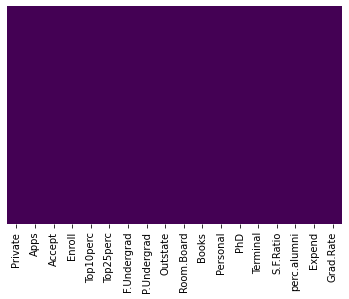

In [7]:
# Let's check for any missing values present in the data
sns.heatmap(df.isna(), yticklabels= False, cbar= False, cmap='viridis')

We see that there are no missing values present in the data

In [8]:
df.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

Let's look at Grad.Rate vs Room.Board

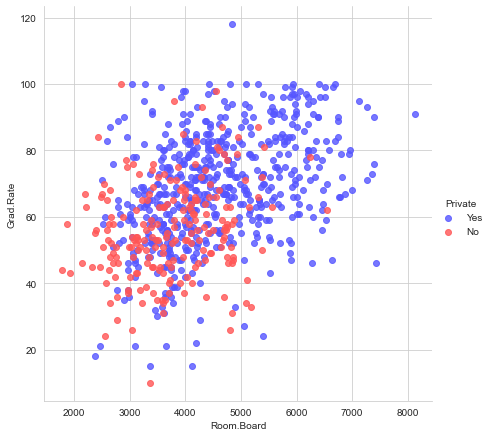

In [9]:
sns.set_style('whitegrid')
sns.lmplot(x='Room.Board',y= 'Grad.Rate',data=df, hue='Private', palette='seismic',height=6,aspect=1,fit_reg=False)

Now let's see plot of F.Underground vs Outstate

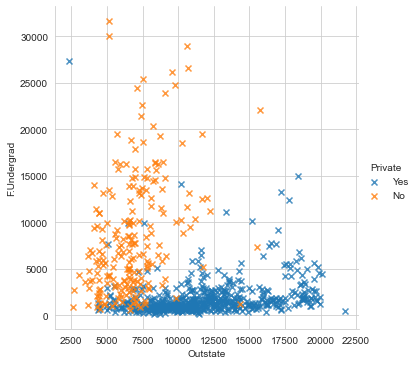

In [10]:
sns.lmplot(x='Outstate',y='F.Undergrad',data=df, hue= 'Private', fit_reg= False, markers='x')

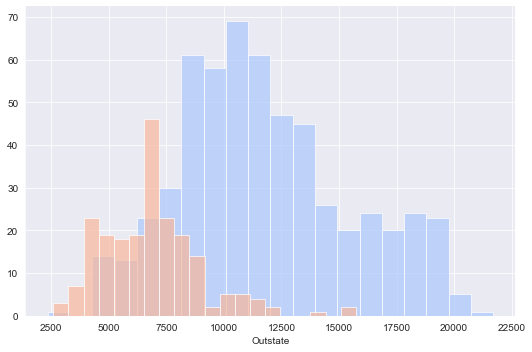

In [11]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',height=5,aspect=1.5)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

**Let's start doing Clustering**

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [33]:
encoded = encoder.fit_transform(df['Private'])
encoded[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [34]:
df['Target'] = encoded
df[:5]

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  \
Abilene Christian University       18.1           12    7041         60   
Adelphi University                 12.2           16   10527         56   
Adrian College                     12.9           30    8735         54   
Agnes Scott College                 7.7           37   19016         59   
Alaska Pacific University          11.9            2   10922         15   

                              Target  
Abilene Christian University       1  
Adelphi University                 1  
Adrian College                     1  
Agnes Scott College                1  
Alaska Pacific University          1

In [15]:
df.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate', 'Target'],
      dtype='object')

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
scaler.fit(df[['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate', 'Target']])

StandardScaler()

In [37]:
scaled_features = scaler.transform(df[['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate', 'Target']])

In [38]:
df_feat = pd.DataFrame(scaled_features, columns= ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate', 'Target'])
df_feat[:5]

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate    Target  
0   1.013776    -0.867574 -0.501910  -0.318252  0.612553  
1  -0.477704    -0.544572  0.166110  -0.551262  0.612553  
2  -0.300749     0.585935 -0.177290  -0.667767  0.612553  
3  -1.615274     1.151188  1.792851  -0.376504  0.612553  
4  -0.553542    -1.675079  0.241803  -2.939613  0.612553

In [39]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)

In [40]:
model.fit(df_feat)

KMeans(n_clusters=2)

In [41]:
model.cluster_centers_

array([[ 0.79393827,  0.87510228,  1.02929729, -0.27296371, -0.14225086,
         1.08984261,  0.81732963, -0.8872479 , -0.54741626,  0.05323282,
         0.54230067,  0.2308543 ,  0.17815959,  0.82697001, -0.691667  ,
        -0.40106716, -0.59310517, -1.49548894],
       [-0.29983839, -0.33049075, -0.38872398,  0.10308736,  0.0537224 ,
        -0.4115895 , -0.30867236,  0.33507766,  0.20673699, -0.02010389,
        -0.20480504, -0.08718434, -0.06728367, -0.31231314,  0.26121467,
         0.15146685,  0.22399185,  0.56478572]])

In [42]:
model.labels_[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [43]:
df_feat.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate    Target  
0   1.013776    -0.867574 -0.501910  -0.318252  0.612553  
1  -0.477704    -0.544572  0.166110  -0.551262  0.612553  
2  -0.300749     0.585935 -0.177290  -0.667767  0.612553  
3  -1.615274     1.151188  1.792851  -0.376504  0.612553  
4  -0.553542    -1.675079  0.241803  -2.939613  0.612553

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder_new = LabelEncoder()

In [26]:
encoded_new = encoder_new.fit_transform(df_feat['Target'])
encoded_new[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [45]:
df_feat['Target_en'] = encoded_new
df_feat[:5]

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate    Target  Target_en  
0   1.013776    -0.867574 -0.501910  -0.318252  0.612553          1  
1  -0.477704    -0.544572  0.166110  -0.551262  0.612553          1  
2  -0.300749     0.585935 -0.177290  -0.667767  0.612553          1  
3  -1.615274     1.151188  1.792851  -0.376504  0.612553          1  
4  -0.553542    -1.675079  0.241803  -2.939613  0.612553          1

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(df_feat['Target_en'], model.labels_))
print(classification_report(df_feat['Target_en'], model.labels_))

[[200  12]
 [ 13 552]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       212
           1       0.98      0.98      0.98       565

    accuracy                           0.97       777
   macro avg       0.96      0.96      0.96       777
weighted avg       0.97      0.97      0.97       777



* We achieved the accuracy of 97% by comparing the labelled data we had already in the original dataset
* but in real world problems we will not have labelled data

Now let's look at how both the Segemented clusters from KMeans and the original labelled clusters looks

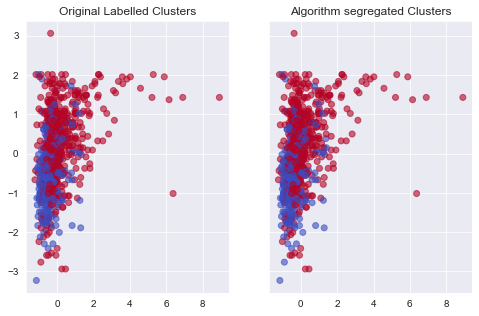

In [47]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey= True, figsize= (8,5))

ax1.set_title('Original Labelled Clusters')
ax1.scatter(df_feat['Expend'], df_feat['Grad.Rate'], c= df_feat['Target'], cmap='coolwarm', alpha=0.6)

ax2.set_title('Algorithm segregated Clusters')
ax2.scatter(df_feat['Expend'], df_feat['Grad.Rate'], c= model.labels_, cmap='coolwarm', alpha= 0.6)

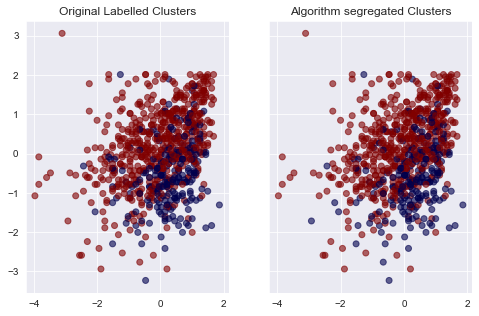

In [48]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey= True, figsize= (8,5))

ax1.set_title('Original Labelled Clusters')
ax1.scatter(df_feat['PhD'], df_feat['Grad.Rate'], c= df_feat['Target'], cmap='seismic', alpha=0.6)

ax2.set_title('Algorithm segregated Clusters')
ax2.scatter(df_feat['PhD'], df_feat['Grad.Rate'], c= model.labels_, cmap='seismic', alpha=0.6)

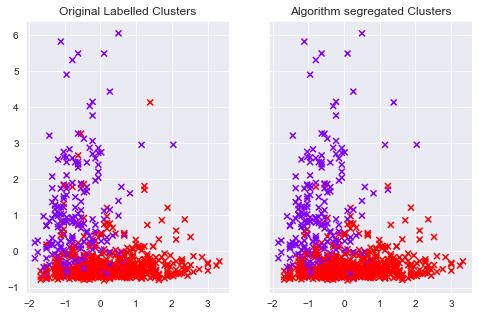

In [49]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey= True, figsize= (8,5))

ax1.set_title('Original Labelled Clusters')
ax1.scatter(df_feat['perc.alumni'], df_feat['Enroll'], c= df_feat['Target_en'], cmap='rainbow', alpha =1, marker='x')

ax2.set_title('Algorithm segregated Clusters')
ax2.scatter(df_feat['perc.alumni'], df_feat['Enroll'], c= model.labels_, cmap='rainbow', alpha = 1, marker='x')

Text(0.5, 1.0, 'Algorithm segregated Cluster')

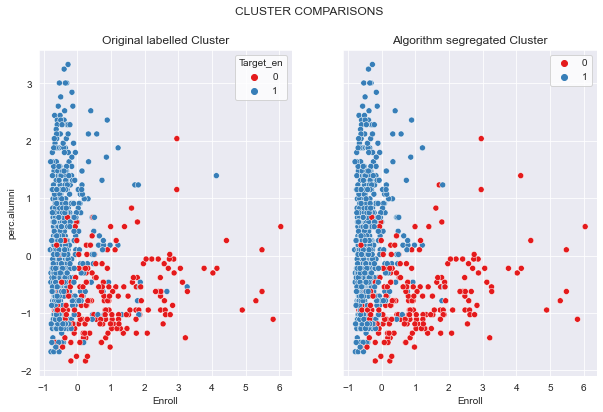

In [50]:
fig,ax1 = plt.subplots(1,2, sharey= True, figsize= (10,6))
sns.set_style('whitegrid')
sns.set_palette('Set1')
fig.suptitle("CLUSTER COMPARISONS")

sns.scatterplot(ax = ax1[0], y=df_feat['perc.alumni'], x=df_feat['Enroll'],  hue= df_feat['Target_en'], marker='o')
ax1[0].set_title("Original labelled Cluster")


sns.scatterplot(ax =ax1[1],y= df_feat['perc.alumni'], x=df_feat['Enroll'],  hue= model.labels_, marker ='o')
ax1[1].set_title("Algorithm segregated Cluster")

**DBSCAN**

In [51]:
from sklearn.cluster import DBSCAN

In [52]:
db = DBSCAN(eps=1.3, min_samples=36)

In [53]:
db.fit(df_feat)

DBSCAN(eps=1.3, min_samples=36)

In [56]:
db.labels_[:5]

array([-1, -1, -1, -1, -1], dtype=int64)

In [57]:
print("Number of clusters :", len(np.unique(db.labels_)))
print("Estimated number of noise points :", np.sum(np.array(db.labels_) == -1, axis=0))

Number of clusters : 1
Estimated number of noise points : 777


In [59]:
df_feat[:5]

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate    Target  Target_en  
0   1.013776    -0.867574 -0.501910  -0.318252  0.612553          1  
1  -0.477704    -0.544572  0.166110  -0.551262  0.612553          1  
2  -0.300749     0.585935 -0.177290  -0.667767  0.612553          1  
3  -1.615274     1.151188  1.792851  -0.376504  0.612553          1  
4  -0.553542    -1.675079  0.241803  -2.939613  0.612553          1

Text(0, 0.5, 'X[1]')

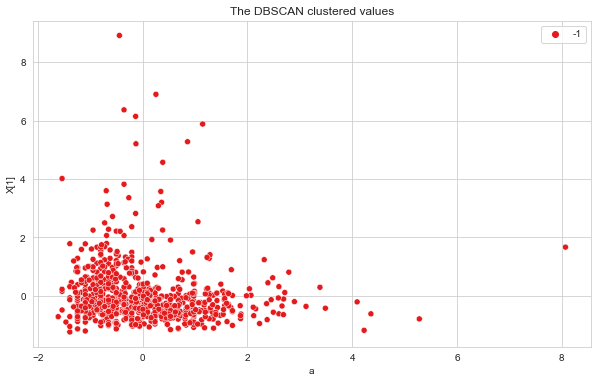

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_feat['Personal'], y=df_feat['Expend'], hue=db.labels_, palette= 'Set1')
plt.title("The DBSCAN clustered values")
plt.xlabel("a")
plt.ylabel("X[1]")

In [69]:
# finding optimal values of epsilon
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(df_feat)
distances, indices = neighbors_fit.kneighbors(df_feat)

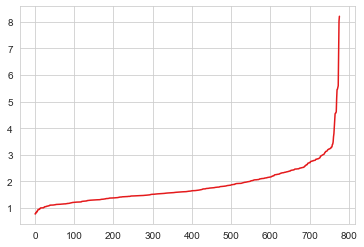

In [70]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

3.2 seems like elbow point

In [94]:
db_optimal = DBSCAN(eps=3.2, min_samples=36)
db_optimal.fit(df_feat)

DBSCAN(eps=3.2, min_samples=36)

In [95]:
db_optimal.labels_[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [96]:
print("Number of clusters :", len(np.unique(db_optimal.labels_)))
print("Estimated number of noise points :", np.sum(np.array(db_optimal.labels_) == -1, axis=0))

Number of clusters : 2
Estimated number of noise points : 89


Text(0, 0.5, 'X[1]')

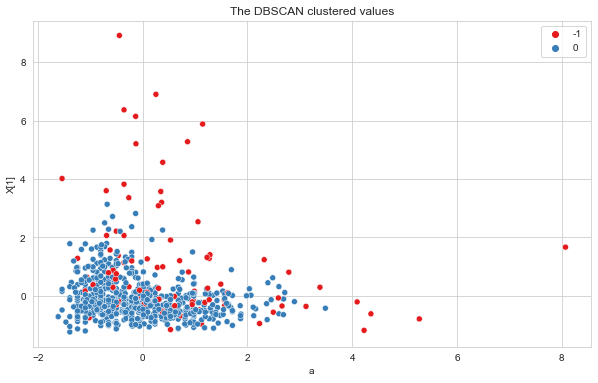

In [97]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_feat['Personal'], y=df_feat['Expend'], hue=db_optimal.labels_, palette= 'Set1')
plt.title("The DBSCAN clustered values")
plt.xlabel("a")
plt.ylabel("X[1]")